In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

from scipy.constants import c as speed_of_light

In [5]:
catalog = fits.open("../../BAM/nsa_v1_0_1.fits")[1].data
h = 1

In [12]:
def absmag2appmag(M, comoving_distance, redshift, Kcorr):
    luminosity_distance = (1+redshift)*comoving_distance
    return M+25+5*np.log10(luminosity_distance)+Kcorr

absolute_magnitude = catalog['SERSIC_ABSMAG'][:, 4] - 5*np.log10(h)
K_correction  = catalog['SERSIC_KCORRECT'][:, 4]
comoving_distance = catalog['ZDIST']*speed_of_light*1e-3/(h*100)
redshift = catalog['Z']
apparent_magnitude = absmag2appmag(absolute_magnitude, comoving_distance, redshift, K_correction)



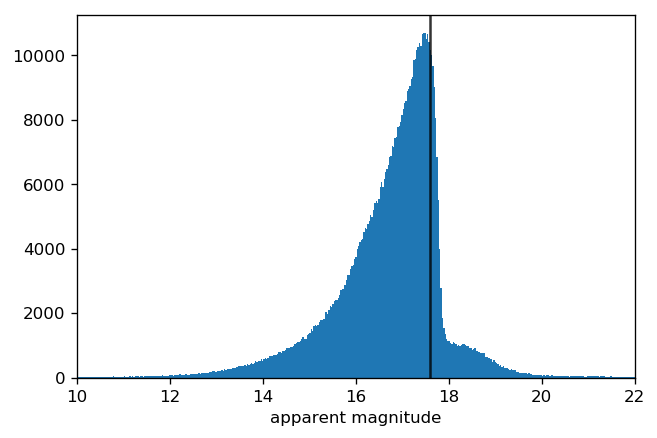

In [18]:
IDS = np.where(np.isfinite(apparent_magnitude))

plt.figure(dpi=120)
plt.hist(apparent_magnitude[IDS], bins='auto')
plt.xlim(10, 22)
plt.axvline(17.6, c='black', alpha=0.8)
plt.xlabel("apparent magnitude")
plt.show()

In [ ]:
# RA = catalog['RA']
# DEC = catalog['DEC']
# MS = catalog['SERSIC_MASS']

# IDS = np.where(np.isfinite(apparent_magnitude))
# absolute_magnitude = absolute_magnitude[IDS]
# apparent_magnitude = apparent_magnitude[IDS]
# RA = RA[IDS]
# DEC = DEC[IDS]
# MS = MS[IDS]
# comoving_distance = comoving_distance[IDS]

# IDS = np.where(np.logical_and(DEC > 0, DEC < 60))
# absolute_magnitude = absolute_magnitude[IDS]
# apparent_magnitude = apparent_magnitude[IDS]
# RA = RA[IDS]
# DEC = DEC[IDS]
# MS = MS[IDS]
# comoving_distance = comoving_distance[IDS]

# IDS = np.where(np.logical_and(RA < 240, RA > 120))
# absolute_magnitude = absolute_magnitude[IDS]
# apparent_magnitude = apparent_magnitude[IDS]
# RA = RA[IDS]
# DEC = DEC[IDS]
# MS = MS[IDS]
# comoving_distance = comoving_distance[IDS]

# IDS = np.where(np.isfinite(MS))
# absolute_magnitude = absolute_magnitude[IDS]
# apparent_magnitude = apparent_magnitude[IDS]
# RA = RA[IDS]
# DEC = DEC[IDS]
# MS = MS[IDS]
# comoving_distance = comoving_distance[IDS]

# IDS = np.where(MS > 0)
# absolute_magnitude = absolute_magnitude[IDS]
# apparent_magnitude = apparent_magnitude[IDS]
# RA = RA[IDS]
# DEC = DEC[IDS]
# MS = MS[IDS]
# comoving_distance = comoving_distance[IDS]



# IDS = np.where(np.logical_and(apparent_magnitude < 17.6, apparent_magnitude>12))
# absolute_magnitude = absolute_magnitude[IDS]
# apparent_magnitude = apparent_magnitude[IDS]
# RA = RA[IDS]
# DEC = DEC[IDS]
# MS = MS[IDS]
# comoving_distance = comoving_distance[IDS]

# logMS = np.log10(MS)-2*np.log10(h)